In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
def prepare_data(data, input_size, output_size, ratio):
  # ratio = [0.7, 0.15]
  coefficient_normalisation = data.values.max()
  data /= coefficient_normalisation

  dataset_length = len(data)
  index_split_1 = int(dataset_length * ratio[0])
  index_split_2 = int(dataset_length * (ratio[0] + ratio[1]))

  train_data = data.loc[ : index_split_1 -1]
  validation_data = data.loc[index_split_1 : index_split_2 - 1]
  test_data = data.loc[index_split_2 : ]

  train_X, train_y = [], []
  for start_index_feature in range(len(train_data)):
    end_index_feature = start_index_feature + input_size
    end_index_prediction = end_index_feature + output_size

    if end_index_prediction > len(train_data):
      break
    
    else:
      slice_x = train_data[start_index_feature : end_index_feature]
      slice_y = train_data[end_index_feature : end_index_prediction]
      train_X.append(slice_x)
      train_y.append(slice_y)

  validation_X, validation_y = [], []
  for start_index_feature in range(len(validation_data)):
    end_index_feature = start_index_feature + input_size
    end_index_prediction = end_index_feature + output_size

    if end_index_prediction > len(validation_data):
      break
    
    else:
      slice_x = validation_data[start_index_feature : end_index_feature]
      slice_y = validation_data[end_index_feature : end_index_prediction]
      validation_X.append(slice_x)
      validation_y.append(slice_y)


  test_X, test_y = [], []
  for start_index_feature in range(len(test_data)):
    end_index_feature = start_index_feature + input_size
    end_index_prediction = end_index_feature + output_size

    if end_index_prediction > len(test_data):
      break
    
    else:
      slice_x = test_data[start_index_feature : end_index_feature]
      slice_y = test_data[end_index_feature : end_index_prediction]
      test_X.append(slice_x)
      test_y.append(slice_y)

  return np.array(train_X), np.array(train_y), np.array(validation_X), np.array(validation_y), np.array(test_X), np.array(test_y), coefficient_normalisation


In [3]:
def generate_dnn_trained_model(train_X, train_y, input_size, output_size, epochs, batch_size, validation_X, validation_Y, verbose):
  dnn_model = Sequential()
  dnn_model.add(Dense(128, input_dim=input_size, activation="relu"))
  dnn_model.add(Dense(64, activation="relu"))
  dnn_model.add(Dense(32, activation="relu"))
  dnn_model.add(Dense(output_size))

  dnn_model.compile(loss="mean_squared_error", optimizer="adam")

  history = dnn_model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(validation_X, validation_y), verbose=verbose)
  return dnn_model, history

In [14]:
def show_training_history(history):
  plt.figure(figsize=(15, 6))
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.legend()
  plt.show()

In [21]:
def show_results_on_test_set(dnn_model, train_X, train_y, validation_X, validation_y, test_X, test_y, coefficient_normalisation):
  
  train_y_predicted = dnn_model.predict(train_X)
  validation_y_predicted = dnn_model.predict(validation_X)
  test_y_predicted = dnn_model.predict(test_X)

  # Créer la figure et les sous-figures
  fig = plt.figure(figsize=(20, 32))
  sub1 = fig.add_subplot(3, 1, 1)
  sub2 = fig.add_subplot(3, 1, 2)
  sub3 = fig.add_subplot(3, 1, 3)


  # Tracer les données sur chaque sous-figure
  sub1.set_title('train')
  sub1.plot(train_y, label='actual values')
  sub1.plot(train_y_predicted, label='predicted values')

  sub2.set_title('validation')
  sub2.plot(validation_y, label='actual values')
  sub2.plot(validation_y_predicted, label='predicted values')
  
  sub3.set_title('test')
  sub3.plot(test_y, label='actual values')
  sub3.plot(test_y_predicted, label='predicted values')
  plt.legend()
  plt.show()

In [4]:
os.chdir("drive/My Drive/Cours Python Hetic/Fondements mathématiques & IA - MD4")

In [5]:
data = pd.read_csv("number of travelers.csv")["passengers"]

In [9]:
input_size = 12
output_size = 1
ratio = [0.7, 0.15]
verbose = 2
epochs = 100
batch_size = 16

In [7]:
train_X, train_y, validation_X, validation_y, test_X, test_y, coefficient_normalisation = prepare_data(data, input_size, output_size, ratio)

In [10]:
dnn_model, history = generate_dnn_trained_model(train_X, train_y, input_size, output_size, epochs, batch_size, validation_X, validation_y, verbose)

Epoch 1/100
10/10 - 6s - loss: 0.0629 - val_loss: 0.0168 - 6s/epoch - 610ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0106 - val_loss: 0.0092 - 77ms/epoch - 8ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0054 - val_loss: 0.0033 - 73ms/epoch - 7ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0047 - val_loss: 0.0038 - 56ms/epoch - 6ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0039 - val_loss: 0.0030 - 64ms/epoch - 6ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0036 - val_loss: 0.0026 - 54ms/epoch - 5ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0033 - val_loss: 0.0030 - 70ms/epoch - 7ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0032 - val_loss: 0.0022 - 75ms/epoch - 7ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0031 - val_loss: 0.0026 - 70ms/epoch - 7ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0029 - val_loss: 0.0029 - 76ms/epoch - 8ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0029 - val_loss: 0.0021 - 58ms/epoch - 6ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0027 - val_loss: 0.0018 - 72ms/epoch - 7ms/step
Epoch 13/100
10/10 - 0s -

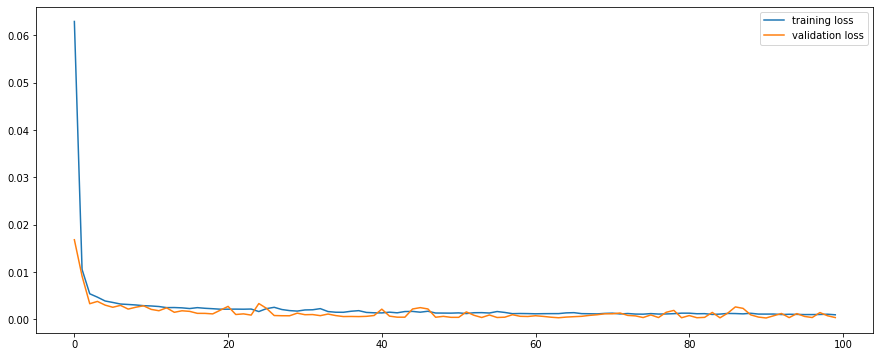

In [15]:
show_training_history(history)

1/1 [==============================] - 0s 21ms/step


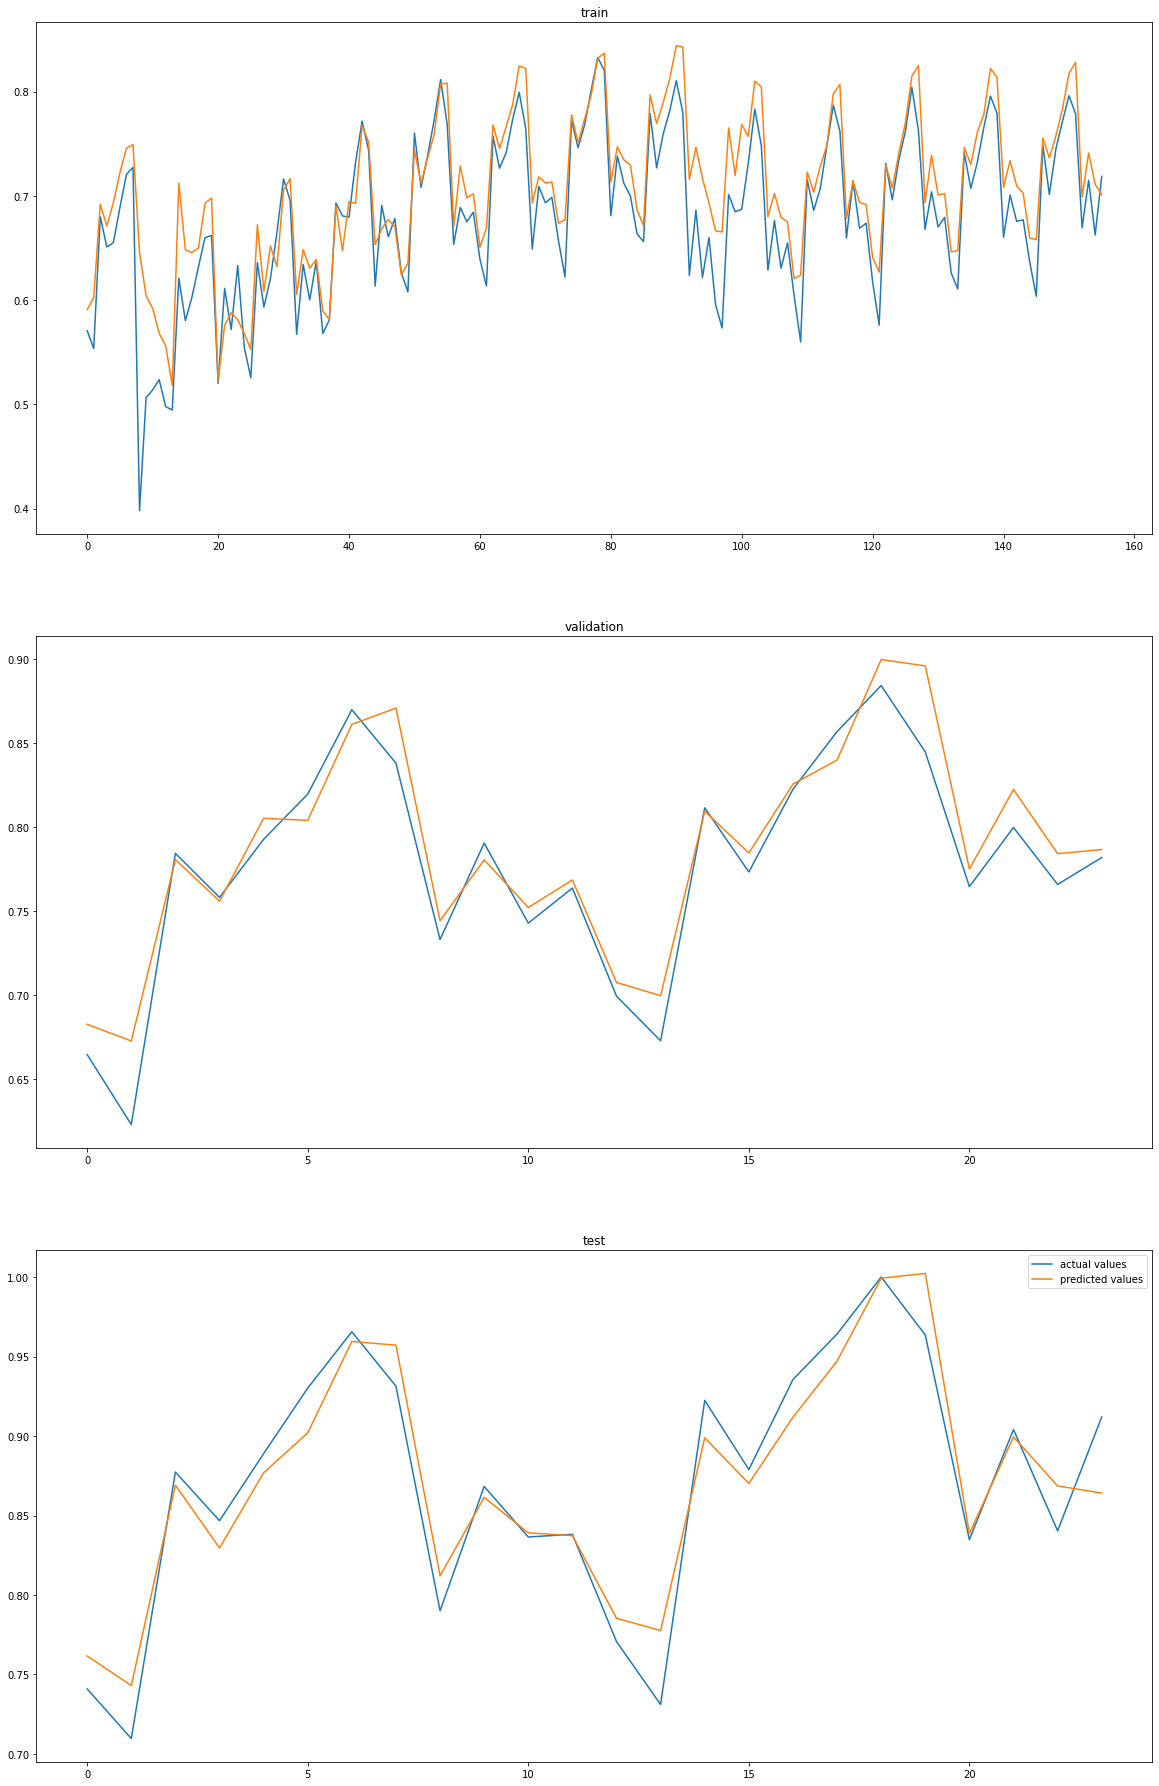

In [22]:
show_results_on_test_set(dnn_model, train_X, train_y, validation_X, validation_y, test_X, test_y, coefficient_normalisation)